- 딥러닝은 회귀를 수행하는 알고리즘이다.
- 분류의 문제를 해결하기 위해 회귀를 통해 계산된 값을 활성화 함수로 다시 계산한다.
- 신경망이 계산하는 결과가 곧 결과가 됨

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고가 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘 (비지도 학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차를 기반으로 표준화 한다.
# 잘못된 학습을 정상화 시키는 목적으로 사용한다.
from sklearn.preprocessing import StandardScaler

# 데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split
# 교차 검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score
# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다.
# 예측 : 주변의 데이터를 보고 가장 많은 결과로 결정한다.
from sklearn.neighbors import KNeighborsClassifier
# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 트리
# 학습시 : 주어진 데이터를 가지고 질문들을 생성한다.
# 예측시 : 질문을 통해 최종 결과를 예측한다.
from sklearn.tree import DecisionTreeClassifier
# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정한다.
# 트리들을 사용한다.
# 학습시 - 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 이렇게 추출된 데이터를 트리의 개수만큼 생성하여 각 트리들에게 주고
# 학습을 수행한다.
# 예측시 - 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종 결과를
# 결정한다.
from sklearn.ensemble import RandomForestClassifier
# 부스팅
# 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리를 앙상블과 동일하다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최 근접 이웃
from sklearn.neighbors import KNeighborsRegressor
# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation

# 조기중단
from tensorflow.keras.callbacks import EarlyStopping

# 성능이 개선되면 모델을 파일로 자동 저장한다
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장된 딥러닝모델 불러오기 .h5파일
from tensorflow.keras.models import load_model


# 원핫 인코딩 하는 함수
from tensorflow.keras.utils import to_categorical

### 데이터를 불러온다

In [2]:
df1 = pd.read_csv('data/boston.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


### 데이터 전처리는 전에 했는데 멀쩡해서 안했다

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     336 non-null    float64
 1   ZN       336 non-null    float64
 2   INDUS    336 non-null    float64
 3   CHAS     336 non-null    int64  
 4   NOX      336 non-null    float64
 5   RM       336 non-null    float64
 6   AGE      336 non-null    float64
 7   DIS      336 non-null    float64
 8   RAD      336 non-null    int64  
 9   TAX      336 non-null    int64  
 10  PTRATIO  336 non-null    float64
 11  B        336 non-null    float64
 12  LSTAT    336 non-null    float64
 13  target   336 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.9 KB


### 독립변수 종속변수 나누기

In [4]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

display(X)
display(y)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64

In [5]:
# 입력데이터 X 의 컬럼 개수를 파악한다.
n_features = X.shape[1]
n_features

13

In [6]:
# 표준화
# 머신러닝 -> 학습이 정상적으로 이루어지기 위해...
# 딥러닝 -> 학습 속도를 빠르게 하기 위해..
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

In [7]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [8]:
# 모델을 설계한다.
model = Sequential()

# 첫 번째 인닉층은 input_dim 속성을 통해 입력층의 노드를 설정해 준다.
model.add(Dense(40, input_dim=n_features))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

# 출력층
# 회귀인 경우
# 출력층의 노드의 개수는 예측해야할 데이터의 수로 넣어준다.
# 출력층의 활성화 함수는 없다
model.add(Dense(1))


In [9]:
# 모델 컴파일
# loss : 오차를 평가할 함수. 
# 회귀 : mean_squared_error
# optimizer : 경사하강법. adam을 사용한다.
# metircs : 회귀인 경우에는 설정하지 않는다.
model.compile(loss='mean_squared_error', optimizer='adam')


In [10]:
# 학습용과 검증용 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [11]:
# 조기 중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않는 다고 한다면
# 학습을 중단시킨다.
# patience : 손실률을 몇번을 더 볼것인가를 설정한다. 손실률이 개선되고 여기서
# 정한 학습 횟수만큼 더 진행이 되는 동안에 개선이되지 않는다면 중단한다.
callback1 = EarlyStopping(monitor='val_loss', patience=50)


In [12]:
# 자동 저장
# 검증용 데이터의 손실률을 모니터링 하게 하여 개선이 될 경우 저장한다
file_name = '08_model.h5'

# save_best_only : 모니터링하는 손실률의 최하 수치보다 더 개선이 될 때만
# 저장한다.
callback2 = ModelCheckpoint(filepath=file_name, monitor='val_loss',
                           save_best_only=True)


In [13]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test),
                   callbacks=[callback1, callback2])


Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 735.4077 - val_loss: 611.0516
Epoch 2/10000
1/1 [==============================] - 0s 91ms/step - loss: 734.0351 - val_loss: 609.9997
Epoch 3/10000
1/1 [==============================] - 0s 93ms/step - loss: 732.6819 - val_loss: 608.9448
Epoch 4/10000
1/1 [==============================] - 0s 88ms/step - loss: 731.3022 - val_loss: 607.8628
Epoch 5/10000
1/1 [==============================] - 0s 92ms/step - loss: 729.9010 - val_loss: 606.7714
Epoch 6/10000
1/1 [==============================] - 0s 98ms/step - loss: 728.4908 - val_loss: 605.6489
Epoch 7/10000
1/1 [==============================] - 0s 101ms/step - loss: 727.0563 - val_loss: 604.4630
Epoch 8/10000
1/1 [==============================] - 0s 94ms/step - loss: 725.5815 - val_loss: 603.2567
Epoch 9/10000
1/1 [==============================] - 0s 96ms/step - loss: 724.0687 - val_loss: 601.9886
Epoch 10/10000
1/1 [==============================] - 0s 95ms/ste

1/1 [==============================] - 0s 116ms/step - loss: 276.6847 - val_loss: 256.5227
Epoch 79/10000
1/1 [==============================] - 0s 118ms/step - loss: 266.6447 - val_loss: 248.5375
Epoch 80/10000
1/1 [==============================] - 0s 124ms/step - loss: 256.7030 - val_loss: 240.6116
Epoch 81/10000
1/1 [==============================] - 0s 110ms/step - loss: 246.8800 - val_loss: 232.7413
Epoch 82/10000
1/1 [==============================] - 0s 109ms/step - loss: 237.2024 - val_loss: 224.9529
Epoch 83/10000
1/1 [==============================] - 0s 107ms/step - loss: 227.6978 - val_loss: 217.2674
Epoch 84/10000
1/1 [==============================] - 0s 98ms/step - loss: 218.3851 - val_loss: 209.6860
Epoch 85/10000
1/1 [==============================] - 0s 105ms/step - loss: 209.2826 - val_loss: 202.2220
Epoch 86/10000
1/1 [==============================] - 0s 94ms/step - loss: 200.4035 - val_loss: 194.8902
Epoch 87/10000
1/1 [==============================] - 0s 96ms/s

1/1 [==============================] - 0s 111ms/step - loss: 24.5401 - val_loss: 27.4850
Epoch 157/10000
1/1 [==============================] - 0s 117ms/step - loss: 24.1744 - val_loss: 27.1226
Epoch 158/10000
1/1 [==============================] - 0s 104ms/step - loss: 23.8214 - val_loss: 26.7719
Epoch 159/10000
1/1 [==============================] - 0s 106ms/step - loss: 23.4804 - val_loss: 26.4328
Epoch 160/10000
1/1 [==============================] - 0s 96ms/step - loss: 23.1506 - val_loss: 26.1041
Epoch 161/10000
1/1 [==============================] - 0s 100ms/step - loss: 22.8318 - val_loss: 25.7871
Epoch 162/10000
1/1 [==============================] - 0s 118ms/step - loss: 22.5232 - val_loss: 25.4804
Epoch 163/10000
1/1 [==============================] - 0s 98ms/step - loss: 22.2244 - val_loss: 25.1843
Epoch 164/10000
1/1 [==============================] - 0s 91ms/step - loss: 21.9352 - val_loss: 24.8978
Epoch 165/10000
1/1 [==============================] - 0s 95ms/step - loss

1/1 [==============================] - 0s 107ms/step - loss: 12.6505 - val_loss: 15.5287
Epoch 235/10000
1/1 [==============================] - 0s 105ms/step - loss: 12.5884 - val_loss: 15.4605
Epoch 236/10000
1/1 [==============================] - 0s 107ms/step - loss: 12.5273 - val_loss: 15.3933
Epoch 237/10000
1/1 [==============================] - 0s 98ms/step - loss: 12.4671 - val_loss: 15.3270
Epoch 238/10000
1/1 [==============================] - 0s 96ms/step - loss: 12.4079 - val_loss: 15.2618
Epoch 239/10000
1/1 [==============================] - 0s 98ms/step - loss: 12.3493 - val_loss: 15.1975
Epoch 240/10000
1/1 [==============================] - 0s 93ms/step - loss: 12.2915 - val_loss: 15.1342
Epoch 241/10000
1/1 [==============================] - 0s 93ms/step - loss: 12.2345 - val_loss: 15.0717
Epoch 242/10000
1/1 [==============================] - 0s 89ms/step - loss: 12.1781 - val_loss: 15.0102
Epoch 243/10000
1/1 [==============================] - 0s 90ms/step - loss: 1

1/1 [==============================] - 0s 91ms/step - loss: 9.4518 - val_loss: 12.2509
Epoch 313/10000
1/1 [==============================] - 0s 111ms/step - loss: 9.4247 - val_loss: 12.2249
Epoch 314/10000
1/1 [==============================] - 0s 102ms/step - loss: 9.3980 - val_loss: 12.1991
Epoch 315/10000
1/1 [==============================] - 0s 96ms/step - loss: 9.3714 - val_loss: 12.1736
Epoch 316/10000
1/1 [==============================] - 0s 95ms/step - loss: 9.3451 - val_loss: 12.1482
Epoch 317/10000
1/1 [==============================] - 0s 99ms/step - loss: 9.3190 - val_loss: 12.1232
Epoch 318/10000
1/1 [==============================] - 0s 104ms/step - loss: 9.2931 - val_loss: 12.0984
Epoch 319/10000
1/1 [==============================] - 0s 103ms/step - loss: 9.2674 - val_loss: 12.0735
Epoch 320/10000
1/1 [==============================] - 0s 93ms/step - loss: 9.2418 - val_loss: 12.0487
Epoch 321/10000
1/1 [==============================] - 0s 91ms/step - loss: 9.2166 - 

1/1 [==============================] - 0s 97ms/step - loss: 7.8360 - val_loss: 10.7096
Epoch 392/10000
1/1 [==============================] - 0s 92ms/step - loss: 7.8194 - val_loss: 10.6941
Epoch 393/10000
1/1 [==============================] - 0s 92ms/step - loss: 7.8028 - val_loss: 10.6786
Epoch 394/10000
1/1 [==============================] - 0s 96ms/step - loss: 7.7863 - val_loss: 10.6631
Epoch 395/10000
1/1 [==============================] - 0s 114ms/step - loss: 7.7699 - val_loss: 10.6478
Epoch 396/10000
1/1 [==============================] - 0s 95ms/step - loss: 7.7536 - val_loss: 10.6326
Epoch 397/10000
1/1 [==============================] - 0s 98ms/step - loss: 7.7374 - val_loss: 10.6175
Epoch 398/10000
1/1 [==============================] - 0s 103ms/step - loss: 7.7213 - val_loss: 10.6027
Epoch 399/10000
1/1 [==============================] - 0s 101ms/step - loss: 7.7055 - val_loss: 10.5880
Epoch 400/10000
1/1 [==============================] - 0s 120ms/step - loss: 7.6898 - 

1/1 [==============================] - 0s 104ms/step - loss: 6.7692 - val_loss: 9.6543
Epoch 471/10000
1/1 [==============================] - 0s 113ms/step - loss: 6.7579 - val_loss: 9.6423
Epoch 472/10000
1/1 [==============================] - 0s 107ms/step - loss: 6.7466 - val_loss: 9.6305
Epoch 473/10000
1/1 [==============================] - 0s 116ms/step - loss: 6.7354 - val_loss: 9.6187
Epoch 474/10000
1/1 [==============================] - 0s 125ms/step - loss: 6.7243 - val_loss: 9.6069
Epoch 475/10000
1/1 [==============================] - 0s 124ms/step - loss: 6.7132 - val_loss: 9.5953
Epoch 476/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.7021 - val_loss: 9.5838
Epoch 477/10000
1/1 [==============================] - 0s 111ms/step - loss: 6.6911 - val_loss: 9.5722
Epoch 478/10000
1/1 [==============================] - 0s 106ms/step - loss: 6.6802 - val_loss: 9.5605
Epoch 479/10000
1/1 [==============================] - 0s 103ms/step - loss: 6.6693 - val

1/1 [==============================] - 0s 119ms/step - loss: 5.9747 - val_loss: 8.7712
Epoch 551/10000
1/1 [==============================] - 0s 103ms/step - loss: 5.9662 - val_loss: 8.7605
Epoch 552/10000
1/1 [==============================] - 0s 112ms/step - loss: 5.9577 - val_loss: 8.7500
Epoch 553/10000
1/1 [==============================] - 0s 113ms/step - loss: 5.9490 - val_loss: 8.7395
Epoch 554/10000
1/1 [==============================] - 0s 106ms/step - loss: 5.9403 - val_loss: 8.7292
Epoch 555/10000
1/1 [==============================] - 0s 98ms/step - loss: 5.9316 - val_loss: 8.7188
Epoch 556/10000
1/1 [==============================] - 0s 103ms/step - loss: 5.9229 - val_loss: 8.7084
Epoch 557/10000
1/1 [==============================] - 0s 95ms/step - loss: 5.9143 - val_loss: 8.6981
Epoch 558/10000
1/1 [==============================] - 0s 97ms/step - loss: 5.9057 - val_loss: 8.6878
Epoch 559/10000
1/1 [==============================] - 0s 99ms/step - loss: 5.8972 - val_los

1/1 [==============================] - 0s 105ms/step - loss: 5.3301 - val_loss: 8.0663
Epoch 631/10000
1/1 [==============================] - 0s 98ms/step - loss: 5.3224 - val_loss: 8.0589
Epoch 632/10000
1/1 [==============================] - 0s 97ms/step - loss: 5.3148 - val_loss: 8.0514
Epoch 633/10000
1/1 [==============================] - 0s 98ms/step - loss: 5.3072 - val_loss: 8.0439
Epoch 634/10000
1/1 [==============================] - 0s 98ms/step - loss: 5.2996 - val_loss: 8.0362
Epoch 635/10000
1/1 [==============================] - 0s 91ms/step - loss: 5.2921 - val_loss: 8.0287
Epoch 636/10000
1/1 [==============================] - 0s 90ms/step - loss: 5.2846 - val_loss: 8.0213
Epoch 637/10000
1/1 [==============================] - 0s 109ms/step - loss: 5.2770 - val_loss: 8.0140
Epoch 638/10000
1/1 [==============================] - 0s 95ms/step - loss: 5.2695 - val_loss: 8.0067
Epoch 639/10000
1/1 [==============================] - 0s 90ms/step - loss: 5.2620 - val_loss: 7

1/1 [==============================] - 0s 88ms/step - loss: 4.6386 - val_loss: 7.3727
Epoch 711/10000
1/1 [==============================] - 0s 96ms/step - loss: 4.6306 - val_loss: 7.3637
Epoch 712/10000
1/1 [==============================] - 0s 93ms/step - loss: 4.6227 - val_loss: 7.3553
Epoch 713/10000
1/1 [==============================] - 0s 96ms/step - loss: 4.6148 - val_loss: 7.3474
Epoch 714/10000
1/1 [==============================] - 0s 85ms/step - loss: 4.6069 - val_loss: 7.3396
Epoch 715/10000
1/1 [==============================] - 0s 91ms/step - loss: 4.5989 - val_loss: 7.3319
Epoch 716/10000
1/1 [==============================] - 0s 94ms/step - loss: 4.5908 - val_loss: 7.3244
Epoch 717/10000
1/1 [==============================] - 0s 98ms/step - loss: 4.5828 - val_loss: 7.3171
Epoch 718/10000
1/1 [==============================] - 0s 90ms/step - loss: 4.5746 - val_loss: 7.3102
Epoch 719/10000
1/1 [==============================] - 0s 87ms/step - loss: 4.5665 - val_loss: 7.3

1/1 [==============================] - 0s 98ms/step - loss: 4.0432 - val_loss: 6.6970
Epoch 791/10000
1/1 [==============================] - 0s 99ms/step - loss: 4.0361 - val_loss: 6.6887
Epoch 792/10000
1/1 [==============================] - 0s 99ms/step - loss: 4.0293 - val_loss: 6.6786
Epoch 793/10000
1/1 [==============================] - 0s 99ms/step - loss: 4.0223 - val_loss: 6.6673
Epoch 794/10000
1/1 [==============================] - 0s 96ms/step - loss: 4.0154 - val_loss: 6.6571
Epoch 795/10000
1/1 [==============================] - 0s 98ms/step - loss: 4.0085 - val_loss: 6.6476
Epoch 796/10000
1/1 [==============================] - 0s 94ms/step - loss: 4.0017 - val_loss: 6.6380
Epoch 797/10000
1/1 [==============================] - 0s 97ms/step - loss: 3.9949 - val_loss: 6.6280
Epoch 798/10000
1/1 [==============================] - 0s 106ms/step - loss: 3.9880 - val_loss: 6.6171
Epoch 799/10000
1/1 [==============================] - 0s 97ms/step - loss: 3.9812 - val_loss: 6.

Epoch 870/10000
1/1 [==============================] - 0s 114ms/step - loss: 3.5373 - val_loss: 5.9412
Epoch 871/10000
1/1 [==============================] - 0s 100ms/step - loss: 3.5318 - val_loss: 5.9329
Epoch 872/10000
1/1 [==============================] - 0s 97ms/step - loss: 3.5264 - val_loss: 5.9250
Epoch 873/10000
1/1 [==============================] - 0s 105ms/step - loss: 3.5209 - val_loss: 5.9174
Epoch 874/10000
1/1 [==============================] - 0s 112ms/step - loss: 3.5155 - val_loss: 5.9102
Epoch 875/10000
1/1 [==============================] - 0s 116ms/step - loss: 3.5101 - val_loss: 5.9024
Epoch 876/10000
1/1 [==============================] - 0s 117ms/step - loss: 3.5048 - val_loss: 5.8939
Epoch 877/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.4995 - val_loss: 5.8854
Epoch 878/10000
1/1 [==============================] - 0s 115ms/step - loss: 3.4941 - val_loss: 5.8769
Epoch 879/10000
1/1 [==============================] - 0s 112ms/step - los

1/1 [==============================] - 0s 115ms/step - loss: 3.1430 - val_loss: 5.3777
Epoch 951/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.1383 - val_loss: 5.3723
Epoch 952/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.1337 - val_loss: 5.3660
Epoch 953/10000
1/1 [==============================] - 0s 103ms/step - loss: 3.1292 - val_loss: 5.3596
Epoch 954/10000
1/1 [==============================] - 0s 100ms/step - loss: 3.1247 - val_loss: 5.3540
Epoch 955/10000
1/1 [==============================] - 0s 102ms/step - loss: 3.1201 - val_loss: 5.3488
Epoch 956/10000
1/1 [==============================] - 0s 113ms/step - loss: 3.1156 - val_loss: 5.3442
Epoch 957/10000
1/1 [==============================] - 0s 96ms/step - loss: 3.1111 - val_loss: 5.3399
Epoch 958/10000
1/1 [==============================] - 0s 100ms/step - loss: 3.1067 - val_loss: 5.3335
Epoch 959/10000
1/1 [==============================] - 0s 94ms/step - loss: 3.1020 - val_l

Epoch 1030/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.8210 - val_loss: 5.0085
Epoch 1031/10000
1/1 [==============================] - 0s 105ms/step - loss: 2.8177 - val_loss: 5.0052
Epoch 1032/10000
1/1 [==============================] - 0s 96ms/step - loss: 2.8144 - val_loss: 5.0023
Epoch 1033/10000
1/1 [==============================] - 0s 129ms/step - loss: 2.8111 - val_loss: 4.9980
Epoch 1034/10000
1/1 [==============================] - 0s 112ms/step - loss: 2.8077 - val_loss: 4.9927
Epoch 1035/10000
1/1 [==============================] - 0s 99ms/step - loss: 2.8044 - val_loss: 4.9880
Epoch 1036/10000
1/1 [==============================] - 0s 95ms/step - loss: 2.8012 - val_loss: 4.9848
Epoch 1037/10000
1/1 [==============================] - 0s 89ms/step - loss: 2.7979 - val_loss: 4.9817
Epoch 1038/10000
1/1 [==============================] - 0s 88ms/step - loss: 2.7945 - val_loss: 4.9788
Epoch 1039/10000
1/1 [==============================] - 0s 92ms/step 

1/1 [==============================] - 0s 91ms/step - loss: 2.5735 - val_loss: 4.7344
Epoch 1110/10000
1/1 [==============================] - 0s 93ms/step - loss: 2.5706 - val_loss: 4.7344
Epoch 1111/10000
1/1 [==============================] - 0s 52ms/step - loss: 2.5675 - val_loss: 4.7349
Epoch 1112/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.5648 - val_loss: 4.7337
Epoch 1113/10000
1/1 [==============================] - 0s 93ms/step - loss: 2.5621 - val_loss: 4.7312
Epoch 1114/10000
1/1 [==============================] - 0s 85ms/step - loss: 2.5592 - val_loss: 4.7272
Epoch 1115/10000
1/1 [==============================] - 0s 93ms/step - loss: 2.5561 - val_loss: 4.7224
Epoch 1116/10000
1/1 [==============================] - 0s 88ms/step - loss: 2.5531 - val_loss: 4.7188
Epoch 1117/10000
1/1 [==============================] - 0s 90ms/step - loss: 2.5504 - val_loss: 4.7167
Epoch 1118/10000
1/1 [==============================] - 0s 104ms/step - loss: 2.5474 - va

1/1 [==============================] - 0s 89ms/step - loss: 2.3334 - val_loss: 4.6397
Epoch 1189/10000
1/1 [==============================] - 0s 82ms/step - loss: 2.3307 - val_loss: 4.6396
Epoch 1190/10000
1/1 [==============================] - 0s 54ms/step - loss: 2.3278 - val_loss: 4.6406
Epoch 1191/10000
1/1 [==============================] - 0s 47ms/step - loss: 2.3250 - val_loss: 4.6415
Epoch 1192/10000
1/1 [==============================] - 0s 56ms/step - loss: 2.3222 - val_loss: 4.6400
Epoch 1193/10000
1/1 [==============================] - 0s 110ms/step - loss: 2.3195 - val_loss: 4.6392
Epoch 1194/10000
1/1 [==============================] - 0s 96ms/step - loss: 2.3167 - val_loss: 4.6382
Epoch 1195/10000
1/1 [==============================] - 0s 101ms/step - loss: 2.3139 - val_loss: 4.6375
Epoch 1196/10000
1/1 [==============================] - 0s 100ms/step - loss: 2.3112 - val_loss: 4.6366
Epoch 1197/10000
1/1 [==============================] - 0s 138ms/step - loss: 2.3086 - 

1/1 [==============================] - 0s 49ms/step - loss: 2.1167 - val_loss: 4.6920
Epoch 1268/10000
1/1 [==============================] - 0s 50ms/step - loss: 2.1134 - val_loss: 4.6922
Epoch 1269/10000
1/1 [==============================] - 0s 46ms/step - loss: 2.1102 - val_loss: 4.6921
Epoch 1270/10000
1/1 [==============================] - 0s 50ms/step - loss: 2.1067 - val_loss: 4.6916
Epoch 1271/10000
1/1 [==============================] - 0s 48ms/step - loss: 2.1034 - val_loss: 4.6911


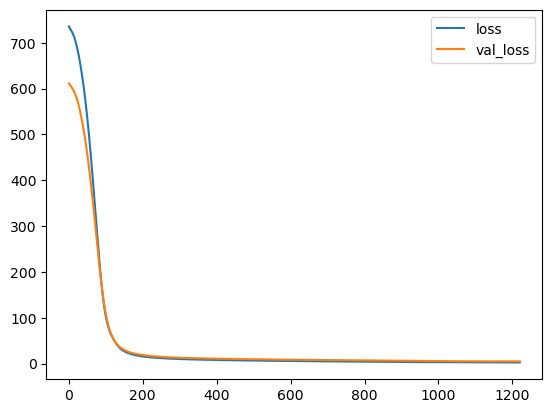

In [14]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()


In [15]:
# 모델을 복원한다
best_model = load_model('08_model.h5')
best_model

In [16]:
# 검증 데이터를 가지고 예측을 한다.
pred = best_model.predict(X_test)
pred

3/3 [==============================] - 0s 3ms/step


array([[26.068045],
       [19.320616],
       [23.133263],
       [25.297192],
       [35.36219 ],
       [25.973736],
       [21.225407],
       [22.594038],
       [19.079245],
       [23.933937],
       [15.871286],
       [18.74133 ],
       [34.01306 ],
       [16.135897],
       [20.177795],
       [19.833197],
       [26.83641 ],
       [17.637535],
       [23.812944],
       [31.71059 ],
       [19.773968],
       [29.98583 ],
       [45.11161 ],
       [20.918976],
       [23.455936],
       [38.2872  ],
       [23.700813],
       [27.908606],
       [20.770233],
       [22.46457 ],
       [19.631311],
       [18.784445],
       [20.231894],
       [23.93218 ],
       [23.353455],
       [29.912434],
       [23.457436],
       [25.310524],
       [28.746443],
       [19.859219],
       [28.579903],
       [21.783821],
       [23.871216],
       [19.87894 ],
       [30.687365],
       [19.776093],
       [26.310001],
       [22.972767],
       [18.163555],
       [19.044106],


In [19]:
# 평가한다.
result = pred.reshape(-1)

r1 = mean_squared_error(y_test, result)
r1

4.629584546396172

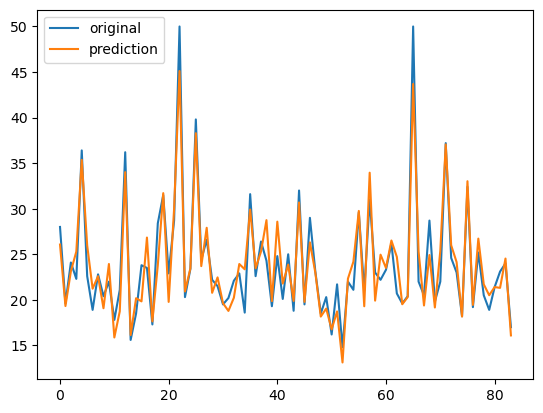

In [20]:
plt.plot(y_test.values, label = 'original')
plt.plot(result, label='prediction')
plt.legend()
plt.show()

# 결과 해석 : 높은 값은 작게 예측하는 경향이 있다(이런 경우 은닉층을 많이 만들면.. 쪼금 해결된다)

### 예측한다.

In [21]:
# 데이터를 불러온다
df2 = pd.read_csv('data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [22]:
# 표준화
X = scaler1.transform(df2)
X

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [23]:
# 저장된 모델을 복원한다.
best_model = load_model('08_model.h5')
best_model

In [24]:
# 예측한다.
pred = best_model.predict(X)
pred

6/6 [==============================] - 0s 2ms/step


array([[ 23.710386],
       [ 22.85267 ],
       [ 25.498245],
       [ 24.489746],
       [ 23.510216],
       [ 28.856792],
       [ 21.524546],
       [ 22.359304],
       [ 26.73171 ],
       [ 22.280998],
       [ 20.029589],
       [ 23.342793],
       [ 26.404701],
       [ 26.986353],
       [ 24.575817],
       [ 24.13592 ],
       [ 23.985506],
       [ 32.03865 ],
       [ 25.416378],
       [ 25.146011],
       [ 44.68293 ],
       [ 44.483974],
       [ 42.516144],
       [ 56.46227 ],
       [ 60.754032],
       [ 55.583733],
       [ 52.542595],
       [ 40.462685],
       [ 71.68055 ],
       [ 47.004604],
       [ 49.453987],
       [ 58.462788],
       [ 54.491234],
       [ 56.513584],
       [ 61.061253],
       [ 66.411446],
       [ 47.084484],
       [ 58.123596],
       [ 76.10261 ],
       [101.679695],
       [ 79.38471 ],
       [ 67.10554 ],
       [106.61877 ],
       [ 86.71857 ],
       [337.20688 ],
       [ 82.24073 ],
       [ 57.626083],
       [ 55.6

In [28]:
# 저장한다
result = pred.reshape(-1)
df2['target'] = result
df2.to_csv('data/boston_dl1.csv')

In [56]:
asdf = np.concatenate((y,result),axis=0)
asdf

array([ 24.        ,  21.6       ,  34.7       ,  33.4       ,
        36.2       ,  28.7       ,  22.9       ,  27.1       ,
        16.5       ,  18.9       ,  15.        ,  18.9       ,
        21.7       ,  20.4       ,  18.2       ,  19.9       ,
        23.1       ,  17.5       ,  20.2       ,  18.2       ,
        13.6       ,  19.6       ,  15.2       ,  14.5       ,
        15.6       ,  13.9       ,  16.6       ,  14.8       ,
        18.4       ,  21.        ,  12.7       ,  14.5       ,
        13.2       ,  13.1       ,  13.5       ,  18.9       ,
        20.        ,  21.        ,  24.7       ,  30.8       ,
        34.9       ,  26.6       ,  25.3       ,  24.7       ,
        21.2       ,  19.3       ,  20.        ,  16.6       ,
        14.4       ,  19.4       ,  19.7       ,  20.5       ,
        25.        ,  23.4       ,  18.9       ,  35.4       ,
        24.7       ,  31.6       ,  23.3       ,  19.6       ,
        18.7       ,  16.        ,  22.2       ,  25.  

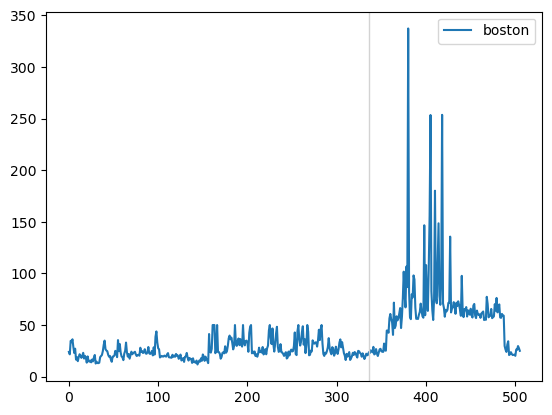

In [62]:
plt.plot(asdf, label = 'boston')
plt.axvline(336, color='lightgray', linestyle='-', linewidth=1)
plt.legend()
plt.show()

In [53]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64